In [169]:
matches = {
    "Qwen1.5-110B": "qwen1.5-110b-chat",
    "Qwen1.5 72B": "qwen1.5-72b-chat",
    "Qwen-14B": "qwen-14b-chat",
    "Qwen-VL-Max": "qwen-max-0428",
    "Reka Core": "reka-core-20240501",
    "Reka Flash": "reka-flash-20240722",
    "Gemma 1.1 7B Instruct": "gemma-1.1-7b-it",
    "Gemma 2 9B": "gemma-2-9b-it",
    "Gemma 2 27B": "gemma-2-27b-it",
    "GLM-4 (0116)": "glm-4-0116",
    "PaLM 2": "palm-2",
    "OLMo-7B": "olmo-7b-instruct",
    "Mistral 7B": "mistral-7b-instruct",
    "Mistral Large": "mistral-large-2402",
    "Mistral Medium": "mistral-medium",
    "Mixtral 8x7B": "mixtral-8x7b-instruct-v0.1",
    "Nemotron-4 340B": "nemotron-4-340b-instruct",
    "DeepSeek-Coder-V2 236B": "deepseek-coder-v2",
    "DeepSeek LLM 67B": "deepseek-llm-67b-chat",
    "DeepSeek-V2.5": "deepseek-v2-api-0628",
    "GPT-4o": "gpt-4o-2024-05-13",
    "GPT-4o mini": "gpt-4o-mini-2024-07-18",
    "GPT-3.5 Turbo": "gpt-3.5-turbo-0125",
    "GPT-4 Turbo": "gpt-4-turbo-2024-04-09",
    "GPT-4": "gpt-4-0613",
    "Claude": "claude-1",
    "Claude 2": "claude-2.1",
    "Claude Instant": "claude-instant-1",
    "Claude 3 Haiku": "claude-3-haiku-20240307",
    "Claude 3 Sonnet": "claude-3-sonnet-20240229",
    "Claude 3 Opus": "claude-3-opus-20240229",
    "Llama 2-13B": "llama-2-13b-chat",
    "Llama 2-70B": "llama-2-70b-chat",
    "Llama 3-70B": "llama-3-70b-instruct",
    "Llama 3-8B": "llama-3-8b-instruct",
    "Llama 3.1-405B": "llama-3.1-405b-instruct",
    "Llama 3.1-70B": "llama-3.1-70b-instruct",
    "Llama 3.1-8B": "llama-3.1-8b-instruct",
    "Yi-34B": "yi-1.5-34b-chat",
    "Yi-Large": "yi-large",
    "phi-3-medium 14B": "phi-3-medium-4k-instruct",
    "phi-3-small 7.4B": "phi-3-small-8k-instruct",
    "Arctic": "snowflake-arctic-instruct",
    "Command R+": "command-r-plus",
    "DBRX": "dbrx-instruct-preview",
    "Gemini 1.5 Pro": "gemini-1.5-pro-api-0514",
}

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv("large_scale_ai_models.csv")
df = df[['System', 'Parameters', 'Training compute (FLOP)', 'Training dataset size (datapoints)']]

In [172]:
filtered_df = df[df['System'].isin(matches)]

In [173]:
assert len(filtered_df) == len(matches)

In [174]:
from leaderbot.data import load
from leaderbot.models import Davidson
data = load()
model = Davidson(data)
model.train()

In [175]:
numeric_cols = ['Parameters', 'Training compute (FLOP)', 'Training dataset size (datapoints)']

score_mapping = dict(zip(model.agents, model.scores().tolist()))
rev_matches = {v:k for k,v in matches.items()}
score_mapping = {rev_matches[k]: v for k, v in score_mapping.items() if k in rev_matches}
sorted_df = df.copy()
sorted_df[numeric_cols] = sorted_df[numeric_cols].apply(np.log)

sorted_df['Score'] = sorted_df['System'].map(score_mapping)
sorted_df = sorted_df.sort_values(by='Score', ascending=True)

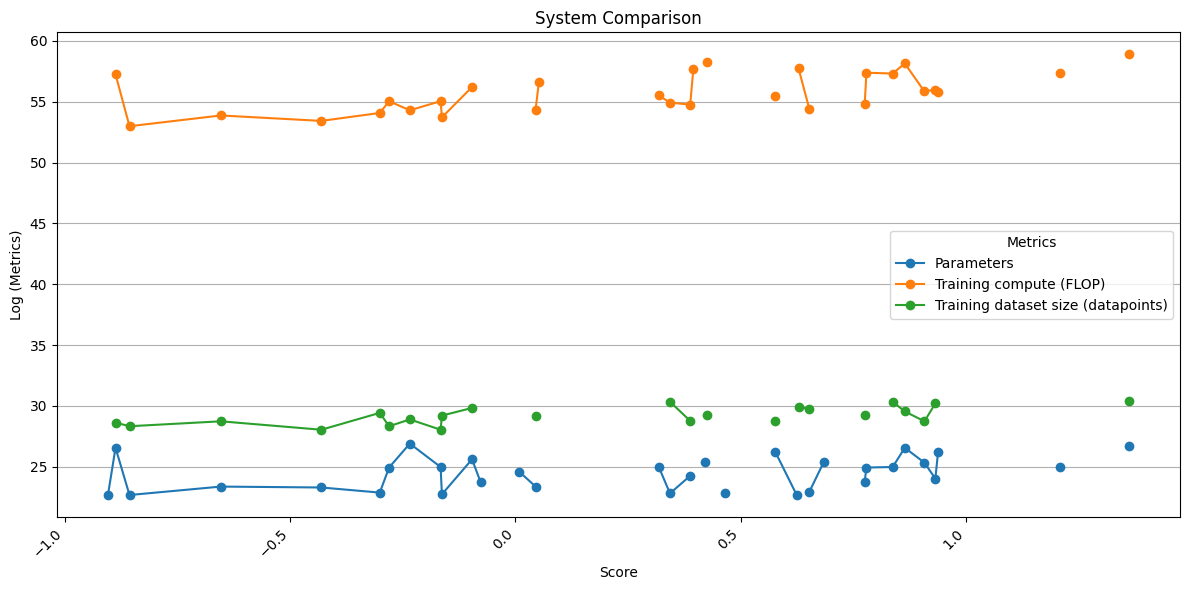

In [176]:

sorted_df.plot(x='Score', #'System', 
    y=['Parameters', 'Training compute (FLOP)', 'Training dataset size (datapoints)'], 
    kind='line', 
    figsize=(12, 6),
    marker='o')

plt.title('System Comparison')
plt.xlabel('Score')
plt.ylabel('Log (Metrics)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

In [177]:
for y in ['Parameters', 'Training compute (FLOP)', 'Training dataset size (datapoints)']:
    correlation = sorted_df['Score'].corr(sorted_df[y])
    print(f"Correlation coefficient of 'Score / Log({y})': {correlation}")

Correlation coefficient of 'Score / Log(Parameters)': 0.32559948368734637
Correlation coefficient of 'Score / Log(Training compute (FLOP))': 0.591622476136189
Correlation coefficient of 'Score / Log(Training dataset size (datapoints))': 0.6510459370207416
